In [193]:
import pandas as pd
import matplotlib.pyplot as plt
#%load functions.ipynb
#import ipynb.fs.defs.functions as func
from pandas.plotting import register_matplotlib_converters
from sklearn.feature_selection import VarianceThreshold

import numpy as np
import matplotlib
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso


data = pd.read_csv('dataset1/pd_speech_features_copy1.csv', sep=',')





Automatically created module for IPython interactive environment
gender
1. feature 58 (0.008013)
PPE
2. feature 583 (0.006449)
DFA
3. feature 125 (0.006386)
RPDE
4. feature 135 (0.006006)
numPulses
5. feature 111 (0.005900)
numPeriodsPulses
6. feature 742 (0.005217)
meanPeriodPulses
7. feature 476 (0.005187)
stdDevPeriodPulses
8. feature 404 (0.005180)
locPctJitter
9. feature 134 (0.005007)
locAbsJitter
10. feature 419 (0.004928)


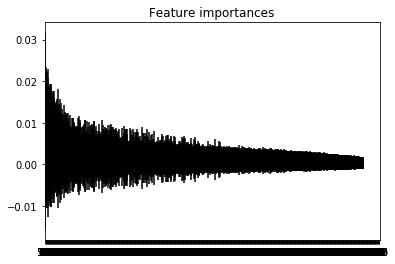

In [197]:
print(__doc__)

import numpy as np

from sklearn.ensemble import ExtraTreesClassifier



X = data.iloc[:,1:753]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features


# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=755,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking

#print("Feature ranking:")

for f in range(10):
    print(X.columns[f])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
   
    

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

print()


In [176]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#print(data.iloc[0:755])

X = data.iloc[:,:54]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range#apply SelectKBest class to extract top 10 best features

#print(X)

bestfeatures = SelectKBest(score_func=chi2, k=54)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features



               Specs         Score
40       GNE_SNR_SEO  1.607153e+06
50       IMF_SNR_SEO  5.459639e+03
32                b3  5.035645e+03
33                b4  2.531284e+03
46     VFER_SNR_TKEO  1.969785e+03
26                f1  1.891602e+03
6   numPeriodsPulses  1.864725e+03
5          numPulses  1.851130e+03
27                f2  1.034453e+03
47      VFER_SNR_SEO  5.805132e+02


In [165]:

#Using Pearson Correlation AFTER PCA!!!
#cor = pca_df_named.corr()

#Using Pearson Correlation Before PCA!!!
cor = data.corr()

#Correlation with output variable  
cor_target = abs(cor["class"])#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.38]

print(relevant_features.sort_values(ascending=True))

tqwt_entropy_log_dec_12    0.381003
tqwt_stdValue_dec_11       0.391081
tqwt_maxValue_dec_12       0.391288
tqwt_stdValue_dec_12       0.393029
tqwt_minValue_dec_12       0.395740
mean_MFCC_2nd_coef         0.398695
class                      1.000000
Name: class, dtype: float64


In [160]:

data.shape  
num_vars = data.select_dtypes(include='number')
num_vars.columns.size

##First selection

selector = VarianceThreshold(data.var().mean())
#selector = VarianceThreshold(data.var().mean())


selector.fit(data)
sel_data = data[data.columns[selector.get_support(indices=True)]]

print(sel_data.head())
sel_data.shape


   app_entropy_shannon_6_coef  app_entropy_shannon_7_coef  \
0                -232253303.7                -459058057.8   
1                -220947833.1                -437011684.1   
2                -214375881.7                -423881698.8   
3                -176812107.4                -330129338.5   
4                -225887933.1                -425927317.4   

   app_entropy_shannon_8_coef  app_entropy_shannon_9_coef  \
0                -902118385.7               -1.886559e+09   
1                -859038700.4               -1.796706e+09   
2                -832850139.0               -1.742079e+09   
3                -625193831.3               -1.306602e+09   
4                -786450935.2               -1.640684e+09   

   app_entropy_shannon_10_coef  
0                  -3937753319  
1                  -3750669277  
2                  -3636913180  
3                  -2722133496  
4                  -3391441982  


(756, 5)

In [159]:
##Second selection

# gender ()
# Recurrence Period Density Entropy (RPDE)
# Pitch Period Entropy (PPE)
# Detrended Fluctuation Analysis (DFA)
# class (1 has PD)
sel_data = data[['gender','PPE','RPDE','DFA','numPulses','class','meanAutoCorrHarmonicity']]

#sel_data

print(sel_data.head())


   gender      PPE     RPDE      DFA  numPulses  class  \
0       1  0.85247  0.57227  0.71826        240      1   
1       1  0.76686  0.53966  0.69481        234      1   
2       1  0.85083  0.58982  0.67604        232      1   
3       0  0.41121  0.59257  0.79672        178      1   
4       0  0.32790  0.53028  0.79782        236      1   

   meanAutoCorrHarmonicity  
0                 0.970805  
1                 0.984322  
2                 0.974846  
3                 0.968343  
4                 0.975754  


In [166]:
##Third Selection

##Using PCA

#number of components used
n_components = 5

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.DataFrame(data)

features = data.columns

x = data.loc[:, features].values
x = StandardScaler().fit_transform(x)

pca = PCA(n_components)
pca.fit(data) 
X_pc = pca.fit_transform(x)
pca_df = pd.DataFrame(X_pc)


# number of components
#print(pca.components_)
n_pcs = pca.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [features[most_important[i]] for i in range(n_pcs)]

# using LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

# build the dataframe
df = pd.DataFrame(dic.items())

pca_df_named = pd.DataFrame(X_pc,columns = df[1])

pca_df_named.insert(n_components,'class', data['class'])

print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

#print(df[1])

print(pca_df_named.head())
print('\n\n\n')

sel_data = pca_df_named

print(sel_data.head())


Explained variation per principal component: [0.12952935 0.09365653 0.08232113 0.04279738 0.03560381]
1  app_LT_entropy_shannon_6_coef  tqwt_entropy_log_dec_26  \
0                     -10.065554                 1.474702   
1                     -10.654185                 1.588302   
2                     -13.533170                -1.245931   
3                      -9.154170                 8.847803   
4                      -6.769873                 4.623100   

1  det_LT_TKEO_std_3_coef  tqwt_entropy_log_dec_36  \
0               -6.838469                -0.783634   
1               -6.821781                 1.413945   
2               -6.804039                 1.410485   
3               15.288280                -4.034485   
4               15.633618                -5.845476   

1  tqwt_entropy_shannon_dec_3  class  
0                   -3.447066      1  
1                   -3.218765      1  
2                   -2.306979      1  
3                   -5.076393      1  
4          

<Figure size 432x288 with 0 Axes>

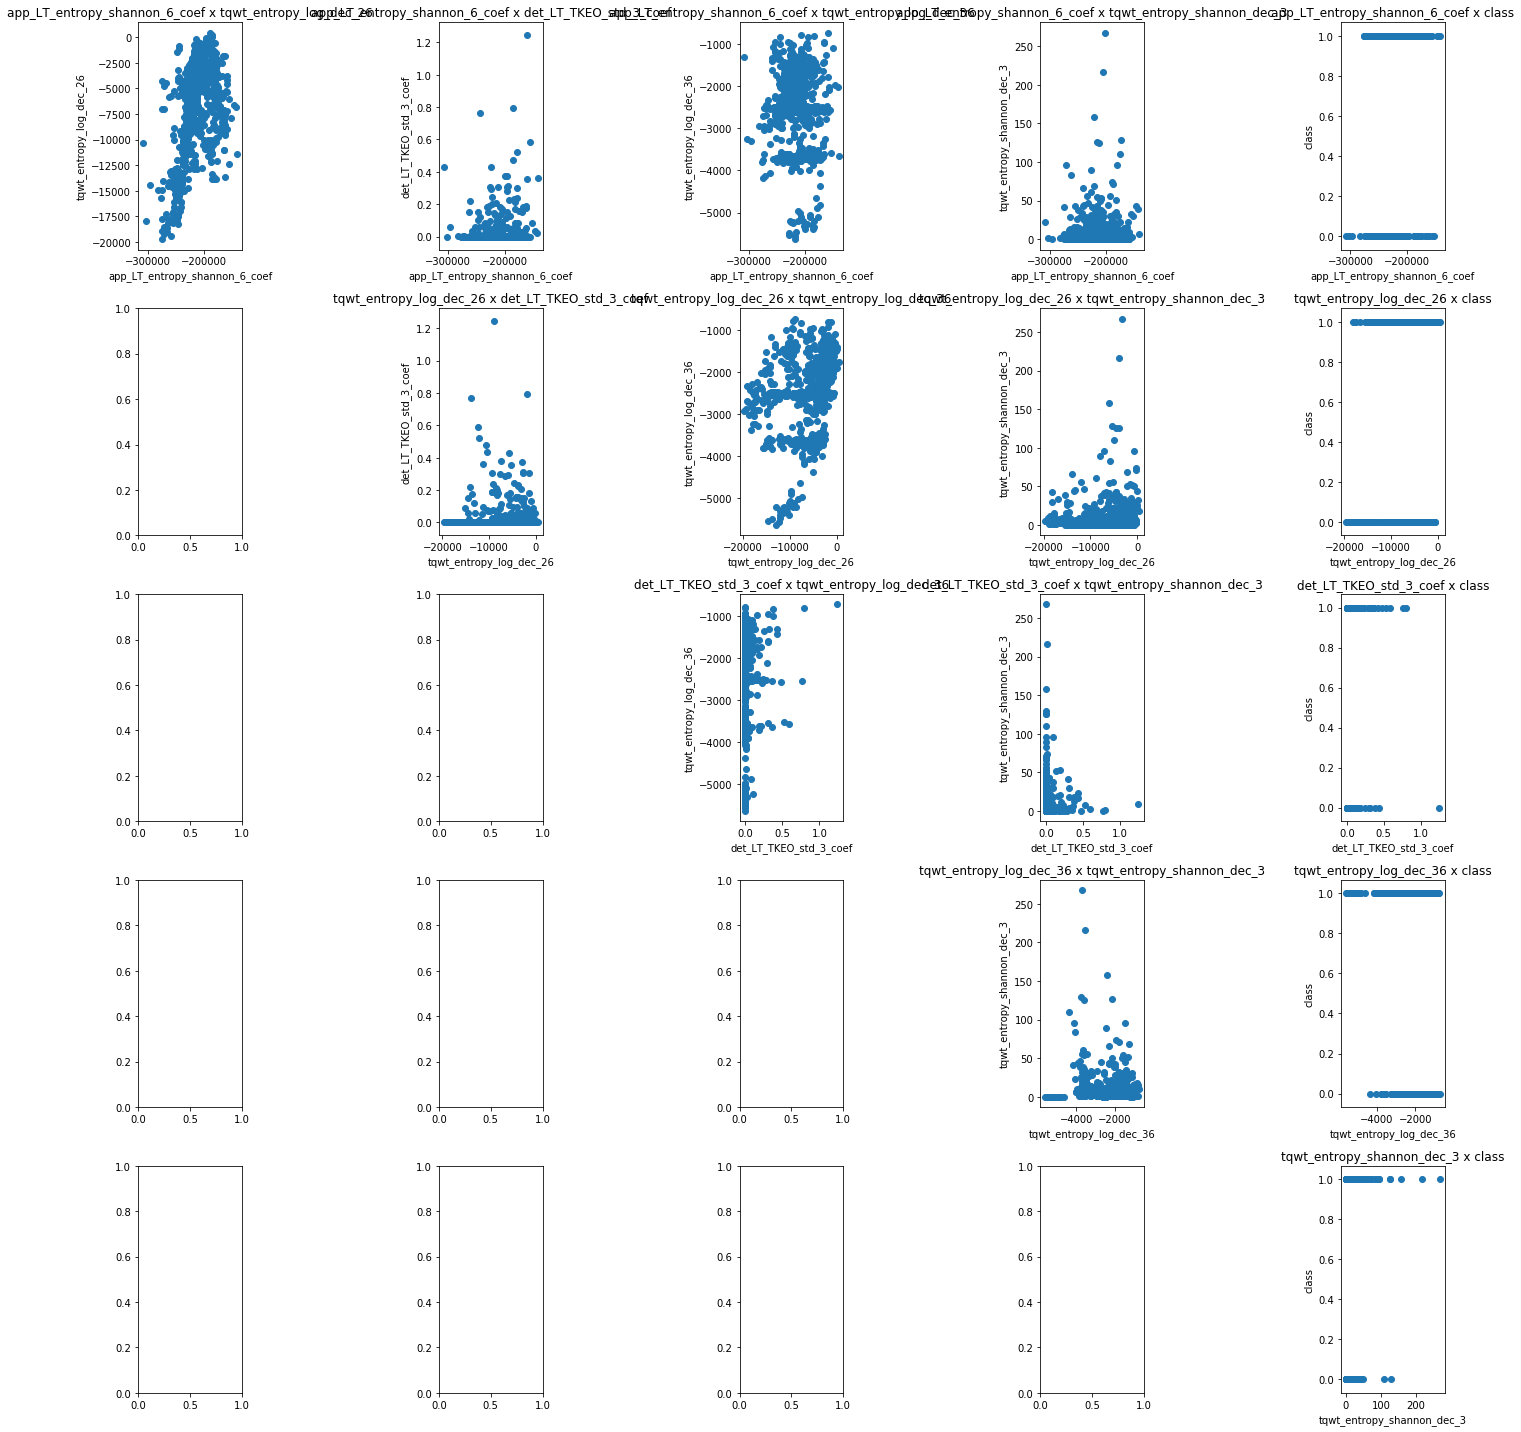

In [167]:
columns = sel_data.select_dtypes(include='number').columns
rows, cols = len(columns)-1, len(columns)-1
plt.figure()
fig, axs = plt.subplots(rows, cols, figsize=(cols*4, rows*4), squeeze=False)
for i in range(len(columns)):
    var1 = columns[i]
    for j in range(i+1, len(columns)):
        var2 = columns[j]
        axs[i, j-1].set_title("%s x %s"%(var1,var2))
        axs[i, j-1].set_xlabel(var1)
        axs[i, j-1].set_ylabel(var2)
        axs[i, j-1].scatter(data[var1], data[var2])
fig.tight_layout()
plt.show()

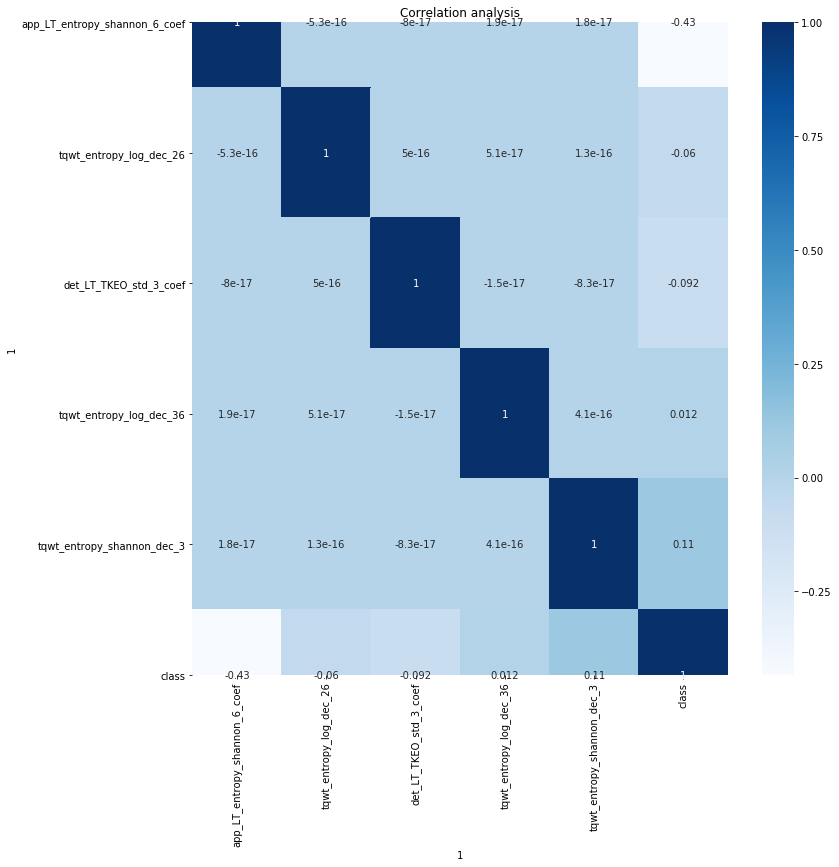

In [150]:
import seaborn as sns

fig = plt.figure(figsize=[12, 12])
corr_mtx = sel_data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [151]:
sel_data.describe(include='all')

1,app_LT_entropy_shannon_6_coef,tqwt_entropy_log_dec_26,det_LT_TKEO_std_3_coef,tqwt_entropy_log_dec_36,tqwt_entropy_shannon_dec_3,class
count,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,7.560000e+02,756.000000
mean,7.636455e-17,-1.104349e-16,-4.693483e-16,-2.652199e-16,1.433304e-16,0.746032
std,9.895665e+00,8.414531e+00,7.888902e+00,5.688130e+00,5.188110e+00,0.435568
min,-3.199071e+01,-2.965877e+01,-8.724810e+00,-3.329539e+01,-2.641235e+01,0.000000
25%,-6.315283e+00,-4.990403e+00,-4.071861e+00,-3.025906e+00,-3.261489e+00,0.000000
50%,1.258905e-01,7.921714e-01,-1.861142e+00,-1.072063e-01,-4.130848e-01,1.000000
75%,6.629138e+00,5.519421e+00,1.430431e+00,2.695985e+00,2.840065e+00,1.000000
max,3.385879e+01,3.570907e+01,8.249357e+01,4.640894e+01,3.624920e+01,1.000000


In [117]:
##Remove highly correlated values THIS IS NOT WORKING!!!


print(data.shape)

# Create correlation matrix
corr_matrix = data.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

#print(to_drop)

# Drop features 
data.drop(columns=to_drop)


print(data.shape)

(756, 755)
(756, 755)
